In [249]:
!pip install pydot graphviz opencv-python

In [250]:
import os
import glob
import errno
import shutil
import numpy as np
import cv2

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [251]:
class_names = ["cat", "dog"]
GLOBAL_RANDOM_STATE = 159034912
NEW_WIDTH = 100

In [252]:
# !wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [4]:
shutil.unpack_archive('kagglecatsanddogs_3367a.zip', 'data/')

In [225]:
def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w: 
        return cv2.resize(img, (size, size), interpolation)
    if h > w: 
        dif = h
    else:
        dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)


def create_or_check_path(path):
    try:
        os.makedirs(path)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

            
def convert_imagefile_to_squaresize(filepath, width, output_dir):
    # Example:
    # convert_imagefile_to_squaresize(os.path.join("data","PetImages","Cat", "0.jpg"), 
    #                                 500, 
    #                                 os.path.join("data","PetImages","Cat_resized_500"))
    create_or_check_path(output_dir)
    im = cv2.imread(filepath)
    if im is not None:
        im_resized = resize2SquareKeepingAspectRation(im, width, cv2.INTER_AREA)
        cv2.imwrite(os.path.join(output_dir, os.path.basename(filepath)), im_resized)

In [226]:
catimgs_filepaths_list = glob.glob(os.path.join("data","PetImages","Cat", "*.*"))
catimgs_filepaths_list[:5]

['data\\PetImages\\Cat\\0.jpg',
 'data\\PetImages\\Cat\\1.jpg',
 'data\\PetImages\\Cat\\10.jpg',
 'data\\PetImages\\Cat\\100.jpg',
 'data\\PetImages\\Cat\\1000.jpg']

In [227]:
dogimgs_filepaths_list = glob.glob(os.path.join("data","PetImages","Dog", "*.*"))
dogimgs_filepaths_list[:5]

['data\\PetImages\\Dog\\0.jpg',
 'data\\PetImages\\Dog\\1.jpg',
 'data\\PetImages\\Dog\\10.jpg',
 'data\\PetImages\\Dog\\100.jpg',
 'data\\PetImages\\Dog\\1000.jpg']

In [229]:
%%time
output_dir = os.path.join("data","PetImages","Cat_resized_%d" % NEW_WIDTH)
for catfilepath in catimgs_filepaths_list:
    convert_imagefile_to_squaresize(catfilepath, NEW_WIDTH, output_dir)

Wall time: 25.2 s


In [230]:
%%time
output_dir = os.path.join("data","PetImages","Dog_resized_%d" % NEW_WIDTH)
for dogfilepath in dogimgs_filepaths_list:
    convert_imagefile_to_squaresize(dogfilepath, NEW_WIDTH, output_dir)

Wall time: 26.8 s


In [231]:
catimgs_filepaths_list = glob.glob(os.path.join("data","PetImages","Cat_resized_%d" % NEW_WIDTH, "*.*"))
catimgs_filepaths_list[:5]

['data\\PetImages\\Cat_resized_100\\0.jpg',
 'data\\PetImages\\Cat_resized_100\\1.jpg',
 'data\\PetImages\\Cat_resized_100\\10.jpg',
 'data\\PetImages\\Cat_resized_100\\100.jpg',
 'data\\PetImages\\Cat_resized_100\\1000.jpg']

In [232]:
dogimgs_filepaths_list = glob.glob(os.path.join("data","PetImages","Dog_resized_%d" % NEW_WIDTH, "*.*"))
dogimgs_filepaths_list[:5]

['data\\PetImages\\Dog_resized_100\\0.jpg',
 'data\\PetImages\\Dog_resized_100\\1.jpg',
 'data\\PetImages\\Dog_resized_100\\10.jpg',
 'data\\PetImages\\Dog_resized_100\\100.jpg',
 'data\\PetImages\\Dog_resized_100\\1000.jpg']

In [233]:
cats_buf = np.zeros((len(catimgs_filepaths_list), NEW_WIDTH, NEW_WIDTH, 3), dtype=np.uint8)
for i, catimgfilepath in enumerate(catimgs_filepaths_list):
    im = cv2.imread(catimgfilepath)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    cats_buf[i] = im # / 255.0
cats_labels = np.zeros((len(catimgs_filepaths_list), 1))

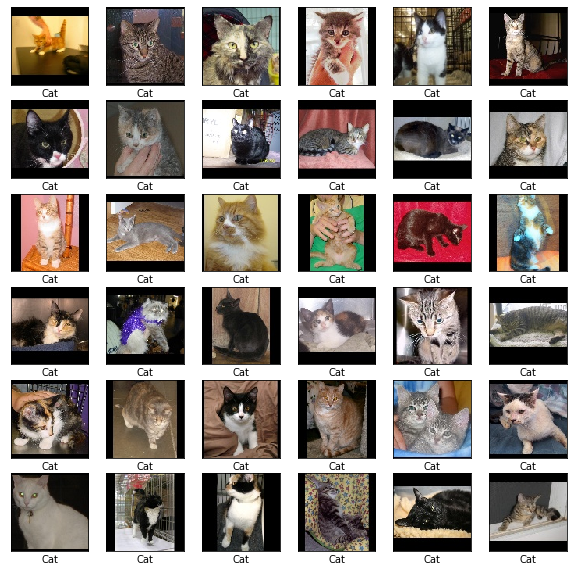

In [235]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cats_buf[i].reshape(NEW_WIDTH,NEW_WIDTH,3), cmap=plt.cm.binary)
    plt.xlabel("Cat")
plt.show()

In [236]:
dogs_buf = np.zeros((len(dogimgs_filepaths_list), NEW_WIDTH, NEW_WIDTH, 3), dtype=np.uint8)
for i, dogimgfilepath in enumerate(dogimgs_filepaths_list):
    im = cv2.imread(dogimgfilepath)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    dogs_buf[i] = im # / 255.0
dogs_labels = np.ones((len(dogimgs_filepaths_list), 1))

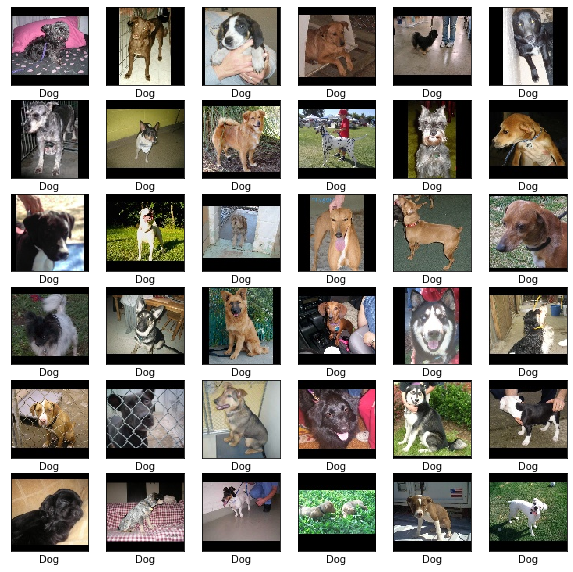

In [237]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dogs_buf[i].reshape(NEW_WIDTH,NEW_WIDTH,3), cmap=plt.cm.binary)
    plt.xlabel("Dog")
plt.show()

In [238]:
train_images = np.vstack((cats_buf, dogs_buf))
train_labels = np.vstack((cats_labels, dogs_labels))

# train_labels = keras.utils.to_categorical(train_labels, len(class_names))

In [239]:
train_images.shape

(24946, 100, 100, 3)

In [240]:
train_labels.shape

(24946, 1)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=GLOBAL_RANDOM_STATE)

In [242]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=GLOBAL_RANDOM_STATE)

In [243]:
print("X_train.shape:", str(X_train.shape))
print("X_valid.shape:", str(X_valid.shape))
print("X_test.shape:", str(X_test.shape))


X_train.shape: (17462, 100, 100, 3)
X_valid.shape: (3742, 100, 100, 3)
X_test.shape: (3742, 100, 100, 3)


In [244]:
np.save("X_train", X_train)
np.save("y_train", y_train)

np.save("X_valid", X_valid)
np.save("y_valid", y_valid)

np.save("X_test", X_test)
np.save("y_test", y_test)

In [245]:
X_train.dtype

dtype('uint8')